In [516]:
import pandas as pd
import pygwalker as pyg
import matplotlib.pyplot as plt

In [517]:
data= pd.read_csv('covid.csv')
print(data)
data.dtypes

      Date_reported Country_code      Country WHO_region  New_cases  \
0        2020-01-05           AF  Afghanistan       EMRO        NaN   
1        2020-01-12           AF  Afghanistan       EMRO        NaN   
2        2020-01-19           AF  Afghanistan       EMRO        NaN   
3        2020-01-26           AF  Afghanistan       EMRO        NaN   
4        2020-02-02           AF  Afghanistan       EMRO        NaN   
...             ...          ...          ...        ...        ...   
35804    2021-07-18           NE        Niger       AFRO       35.0   
35805    2021-07-25           NE        Niger       AFRO       25.0   
35806    2021-08-01           NE        Niger       AFRO       25.0   
35807    2021-08-08           NE        Niger       AFRO       59.0   
35808    2021-08-15           NE        Niger       AFRO       40.0   

       Cumulative_cases  New_deaths  Cumulative_deaths  
0                   0.0         NaN                0.0  
1                   0.0         N

Date_reported         object
Country_code          object
Country               object
WHO_region            object
New_cases            float64
Cumulative_cases     float64
New_deaths           float64
Cumulative_deaths    float64
dtype: object

In [518]:
#  por país
paises = data['Country'].unique()
print(f"Total de países en el dataset: {len(paises)}") 
print("\nAlgunos países representativos:")
print(paises[:10])

# Gráfica con Matplotlib
plt.figure(figsize=(15, 10))
plt.show()

Total de países en el dataset: 157

Algunos países representativos:
['Afghanistan' 'Albania' 'Algeria' 'American Samoa' 'Andorra' 'Angola'
 'Anguilla' 'Antigua and Barbuda' 'Argentina' 'Armenia']


<Figure size 1500x1000 with 0 Axes>

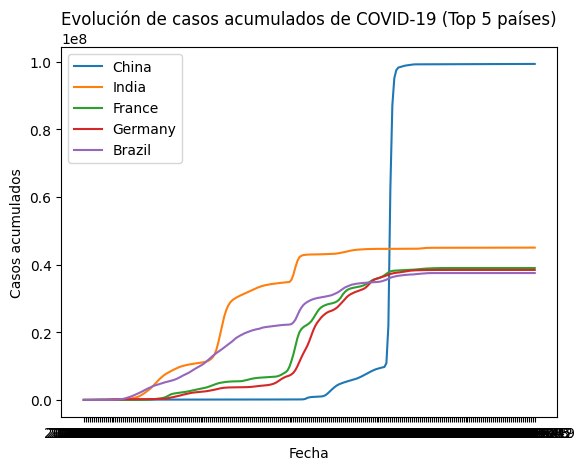

In [519]:
top_countries = data.groupby('Country')['Cumulative_cases'].max().sort_values(ascending=False).head(5).index
for country in top_countries:
    country_data = data[data['Country'] == country]
    plt.plot(country_data['Date_reported'], country_data['Cumulative_cases'], label=country)

plt.title('Evolución de casos acumulados de COVID-19 (Top 5 países)')
plt.xlabel('Fecha')
plt.ylabel('Casos acumulados')
plt.legend()
plt.show()

In [520]:
from bokeh.plotting import figure, show
from bokeh.models import ColumnDataSource
from bokeh.io import output_notebook

In [521]:
#Gráficas con Bokeh
output_notebook() 
argentina = data[data['Country'] == 'Argentina'].dropna(subset=['New_cases'])
afghanistan = data[data['Country'] == 'Afghanistan'].dropna(subset=['New_cases'])
algeria = data[data['Country'] == 'Algeria'].dropna(subset=['New_cases'])


Loading BokehJS ...

In [522]:
p = figure(title="Nuevos Casos diarios de COVID-19", 
           x_axis_label='Fecha', 
           y_axis_label='Casos nuevos' )
p.line(argentina['Date_reported'], argentina['New_cases'], legend_label="Argentina", line_width=2, color="blue")
p.line(afghanistan['Date_reported'], afghanistan['New_cases'], legend_label="Afganistán", line_width=2, color="red")
p.line(algeria['Date_reported'], algeria['New_cases'], legend_label="Argelia", line_width=2, color="green")
show(p)


In [523]:
import numpy as np


In [524]:
# Cargar el archivo CSV
data = pd.read_csv('covid.csv')

# 1. Añadir columna 'Casos_por_millon' (ejemplo calculado)
poblaciones = {
    'Afghanistan': 38928341,
    'Albania': 2877797,
    'Algeria': 43851044,
    'Andorra': 77265,
    'Angola': 32866268,
    'Antigua and Barbuda': 97928,
    'Argentina': 45195774
}

In [525]:
data['Poblacion'] = data['Country'].map(poblaciones)
data['Casos_por_millon'] = (data['Cumulative_cases'] / data['Poblacion']) * 1e6

In [526]:
# Tasa_mortalidad
data['Tasa_mortalidad'] = (data['Cumulative_deaths'] / data['Cumulative_cases']) * 100
#Incremento_semanal
data['Incremento_semanal'] = data.groupby('Country')['New_cases'].diff()

In [527]:
data.to_csv('covid_nuevas_columnas.csv', index=False)

In [528]:
print(data)

      Date_reported Country_code      Country WHO_region  New_cases  \
0        2020-01-05           AF  Afghanistan       EMRO        NaN   
1        2020-01-12           AF  Afghanistan       EMRO        NaN   
2        2020-01-19           AF  Afghanistan       EMRO        NaN   
3        2020-01-26           AF  Afghanistan       EMRO        NaN   
4        2020-02-02           AF  Afghanistan       EMRO        NaN   
...             ...          ...          ...        ...        ...   
35804    2021-07-18           NE        Niger       AFRO       35.0   
35805    2021-07-25           NE        Niger       AFRO       25.0   
35806    2021-08-01           NE        Niger       AFRO       25.0   
35807    2021-08-08           NE        Niger       AFRO       59.0   
35808    2021-08-15           NE        Niger       AFRO       40.0   

       Cumulative_cases  New_deaths  Cumulative_deaths   Poblacion  \
0                   0.0         NaN                0.0  38928341.0   
1      

In [529]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [530]:
# Preparar datos usando Argentina 
argentina = data[data['Country'] == 'Argentina'].dropna()
X = np.arange(len(argentina)).reshape(-1, 1)  # Días como feature
y = argentina['Cumulative_cases'].values      # Casos acumulados

In [531]:
# Dividir datos y entrenar modelo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [532]:
# Predecir los próximos 30 días
future_days = np.arange(len(X), len(X)+30).reshape(-1, 1)
predicciones = model.predict(future_days)

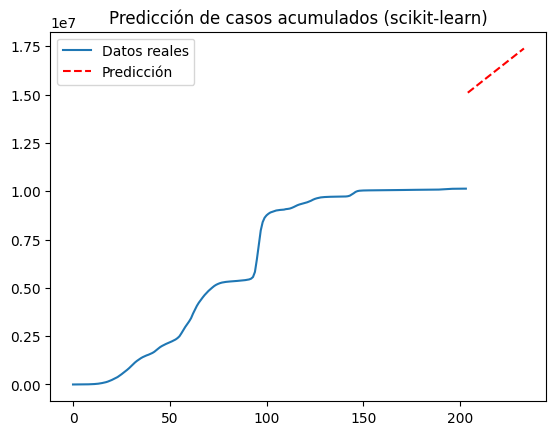

In [533]:
# Graficar los resultados
plt.plot(X, y, label='Datos reales')
plt.plot(future_days, predicciones, 'r--', label='Predicción')
plt.title('Predicción de casos acumulados (scikit-learn)')
plt.legend()
plt.show()